In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [23]:
df = pd.read_csv("data/Aave.csv")

In [24]:
df.shape

(1275, 8)

In [25]:
df.head()

,SNo,Date,Price,Open,High,Low,Vol.,Change %
0,1,2018-01-30,0.15,0.17,0.17,0.14,530470.0,-7.95
1,2,2018-01-31,0.14,0.15,0.15,0.13,396050.0,-11.10
2,3,2018-02-01,0.11,0.14,0.14,0.11,987260.0,-17.46
3,4,2018-02-02,0.10,0.11,0.11,0.08,1810000.0,-8.32
4,5,2018-02-03,0.11,0.10,0.12,0.09,1200000.0,6.85


In [26]:
df.describe()

,SNo,Price,Open,High,Low,Vol.,Change %
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1.275000e+03,1275.000000
mean,638.000000,67.045906,66.742322,71.129875,62.490110,6.741274e+05,5.454431
std,368.205106,139.960408,139.634444,148.895685,130.723039,1.077261e+06,176.107560
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-38.080000
25%,319.500000,0.010000,0.010000,0.010000,0.010000,5.339500e+04,0.000000
50%,638.000000,0.030000,0.030000,0.030000,0.030000,3.105900e+05,0.000000
75%,956.500000,0.580000,0.580000,0.620000,0.540000,8.440000e+05,0.000000
max,1275.000000,629.380000,629.380000,665.180000,564.850000,1.050000e+07,6284.530000


In [27]:
df.columns

Index(['SNo', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [28]:
df.describe(exclude=np.number)

,Date
count,1275
unique,1275
top,2018-01-30
freq,1


In [29]:
df.nunique(axis=0)

SNo         1275
Date        1275
Price        353
Open         354
High         360
Low          351
Vol.        1152
Change %     436
dtype: int64

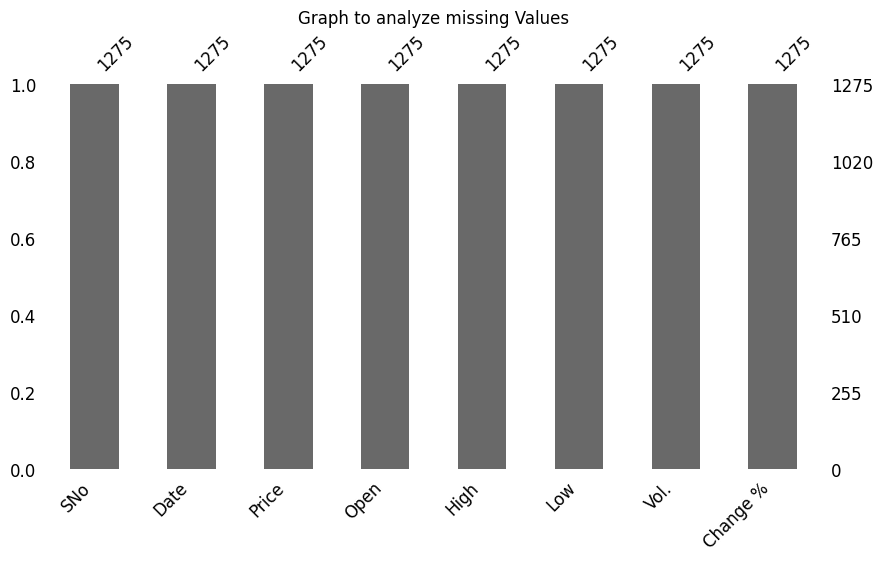

In [30]:
msno.bar(df,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

In [31]:
df_updated = df.drop(["SNo"],axis=1)

In [32]:
df_updated.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2018-01-30,0.15,0.17,0.17,0.14,530470.0,-7.95
1,2018-01-31,0.14,0.15,0.15,0.13,396050.0,-11.10
2,2018-02-01,0.11,0.14,0.14,0.11,987260.0,-17.46
3,2018-02-02,0.10,0.11,0.11,0.08,1810000.0,-8.32
4,2018-02-03,0.11,0.10,0.12,0.09,1200000.0,6.85


In [33]:
correlation = df_updated.corr(numeric_only=True)  
correlation. style. background_gradient (cmap = 'RdYlGn')  

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.995732,0.997871,0.997881,-0.271633,-0.005694
Open,0.995732,1.000000,0.997759,0.996181,-0.271195,-0.008422
High,0.997871,0.997759,1.000000,0.995769,-0.270890,-0.006563
Low,0.997881,0.996181,0.995769,1.000000,-0.270938,-0.006963
Vol.,-0.271633,-0.271195,-0.270890,-0.270938,1.000000,-0.017136
Change %,-0.005694,-0.008422,-0.006563,-0.006963,-0.017136,1.000000


In [34]:
df_updated["Year"] = df_updated["Date"].str.slice(0,4)
df_updated["Month"] = df_updated["Date"].str.slice(5,7)

In [35]:
df_updated.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2018-01-30,0.15,0.17,0.17,0.14,530470.0,-7.95,2018,01
1,2018-01-31,0.14,0.15,0.15,0.13,396050.0,-11.10,2018,01
2,2018-02-01,0.11,0.14,0.14,0.11,987260.0,-17.46,2018,02
3,2018-02-02,0.10,0.11,0.11,0.08,1810000.0,-8.32,2018,02
4,2018-02-03,0.11,0.10,0.12,0.09,1200000.0,6.85,2018,02


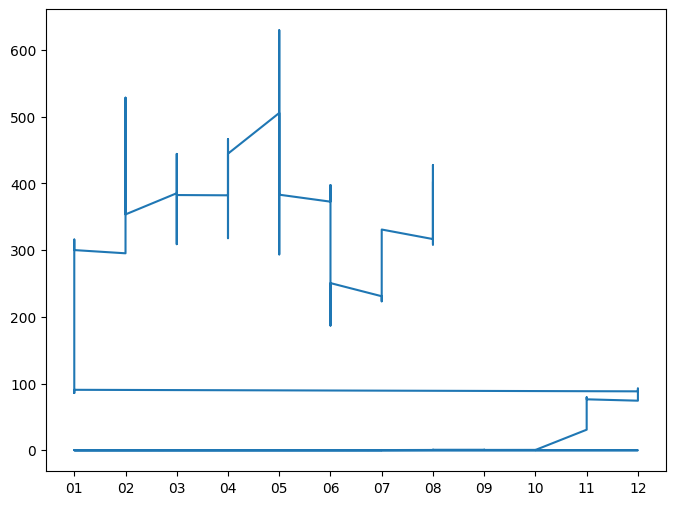

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_updated.Month, df_updated.Price);

In [41]:
df_updated["Date"] = pd.to_datetime(df_updated["Date"])
df_grouped = df_updated.groupby(df_updated.Date.dt.month)['Price'].mean()
df_grouped

Date
1      58.824421
2     105.944867
3      93.946774
4      97.863333
5     110.932419
6      71.518000
7      70.636774
8      78.582393
9       0.202222
10      0.065507
11     19.110814
12     27.670000
Name: Price, dtype: float64

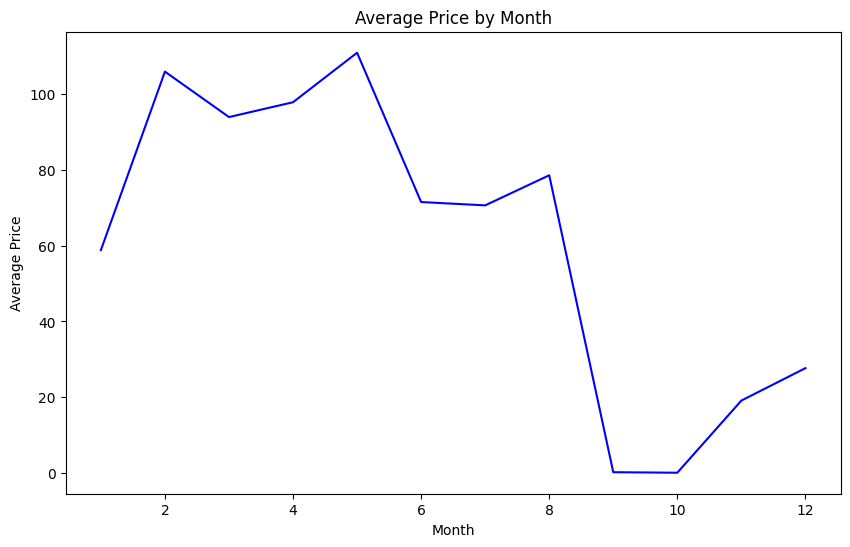

In [42]:
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(df_updated.Month, df_updated.Price);
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
df_grouped.plot(kind='line', color='blue')  # Create a bar plot
plt.title('Average Price by Month')  # Set the title of the plot
plt.xlabel('Month')  # Set the label for the x-axis
plt.ylabel('Average Price')  # Set the label for the y-axis
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()  # Display the plot